## RollingCorrelation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/media/ege/DATA/project/main/Concat_DFs/20220420_CONCAT_DF.csv',index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
SSE_600200,NaN,-0.018381,0.002154,0.002957,-0.007755,0.004269,-0.004792,-0.009405,0.010571,-0.005333,...,-0.006020,0.004889,0.008375,0.008199,0.017107,0.025805,0.010858,0.012968,-0.011120,-0.006575
SSE_600370,NaN,0.003545,0.010333,0.005867,-0.001138,0.005937,0.000526,-0.007356,0.000877,-0.004574,...,-0.001010,0.002134,0.007228,-0.001923,-0.000926,-0.000824,0.005981,-0.004231,0.000897,0.003576
SSE_600740,NaN,0.063349,-0.029221,0.000014,-0.015170,-0.045702,0.013973,-0.021139,-0.011130,0.030462,...,0.001814,-0.000399,0.009778,0.008464,-0.012588,0.001318,-0.004211,-0.001077,0.002951,-0.014847
SSE_600733,NaN,0.000694,0.003244,-0.005348,-0.009995,0.021983,-0.003406,0.023236,0.019706,-0.004843,...,0.002759,0.004102,0.002002,-0.003119,0.001258,0.004474,0.004358,0.004735,0.003374,-0.003202
SSE_600725,NaN,0.043591,0.000312,0.050583,-0.011202,-0.002151,0.007085,-0.002301,0.016496,0.034354,...,0.001101,-0.003177,-0.002870,-0.000654,-0.000668,0.003197,0.003620,0.006272,-0.004485,-0.000180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSE_600522,NaN,-0.004942,-0.019908,-0.028816,-0.058124,-0.004688,0.048855,0.032004,-0.010926,-0.001389,...,0.001512,-0.002304,0.017175,0.038632,0.007813,0.002472,0.003031,0.010951,-0.025210,-0.012817
SSE_600628,NaN,-0.009594,0.035645,0.021788,0.007276,-0.013719,-0.017613,0.112355,-3.082825,-4.401056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
SSE_600219,NaN,-0.002957,0.000769,-0.000776,-0.013042,-0.008750,0.004940,0.009022,0.004085,-0.005856,...,-0.000231,-0.001563,0.001200,-0.001206,0.000801,0.003994,-0.001002,0.003441,-0.001982,-0.001445
SSE_600686,NaN,0.018029,0.002678,0.018703,0.029298,0.024978,-0.004146,-0.006649,-0.005015,-0.011752,...,0.006000,-0.002222,-0.005778,0.006571,-0.004821,0.005224,0.001480,-0.000931,0.010476,-0.000625


In [3]:
x= df.values
df = pd.DataFrame(x[:,1:].T,columns=df.index,index=df.columns.values[1:])
df

,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,SSE_600499,SSE_600512,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569
1,-0.018381,0.003545,0.063349,0.000694,0.043591,-0.054268,0.011419,-0.013340,-0.035012,-0.002653,...,0.019650,0.011389,0.061148,-0.005516,0.004747,-0.004942,-0.009594,-0.002957,0.018029,0.006027
2,0.002154,0.010333,-0.029221,0.003244,0.000312,0.046176,0.005762,0.002259,-0.001232,0.003704,...,0.037224,0.008129,0.018971,-0.029983,0.003602,-0.019908,0.035645,0.000769,0.002678,0.008930
3,0.002957,0.005867,0.000014,-0.005348,0.050583,0.021671,-0.009184,0.028527,-0.029831,0.008810,...,-0.043751,-0.003190,0.100713,0.003463,0.001448,-0.028816,0.021788,-0.000776,0.018703,0.006012
4,-0.007755,-0.001138,-0.015170,-0.009995,-0.011202,0.045769,-0.027556,-0.020983,-0.039045,-0.019061,...,-0.022137,-0.009856,-0.095804,0.002755,-0.004470,-0.058124,0.007276,-0.013042,0.029298,-0.013285
5,0.004269,0.005937,-0.045702,0.021983,-0.002151,-0.005807,-0.010886,-0.005468,0.037556,-0.015727,...,-0.112780,-0.008781,0.069824,-0.010289,-0.001716,-0.004688,-0.013719,-0.008750,0.024978,-0.026795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.025805,-0.000824,0.001318,0.004474,0.003197,0.015629,-0.000180,0.002655,-0.003145,-0.000371,...,0.000000,-0.001502,-0.007121,-0.005283,-0.003086,0.002472,0.000000,0.003994,0.005224,0.003312
231,0.010858,0.005981,-0.004211,0.004358,0.003620,-0.005759,-0.004910,0.007028,-0.013871,-0.002078,...,0.000000,0.000519,0.002636,0.003820,0.002286,0.003031,0.000000,-0.001002,0.001480,0.004517
232,0.012968,-0.004231,-0.001077,0.004735,0.006272,0.008947,-0.002926,0.007032,0.012532,-0.003348,...,0.000000,-0.000332,-0.000246,-0.003763,0.001197,0.010951,0.000000,0.003441,-0.000931,-0.001619
233,-0.011120,0.000897,0.002951,0.003374,-0.004485,-0.008578,0.003372,-0.005121,0.003325,-0.000841,...,0.000000,0.001350,0.000436,-0.004129,0.000034,-0.025210,0.000000,-0.001982,0.010476,0.001943


In [4]:
df.rolling(0).corr(pairwise=True).dropna()

,,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,SSE_600499,SSE_600512,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569


In [5]:
df.rolling(1).corr(pairwise=True).dropna()

,,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,SSE_600499,SSE_600512,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569


In [6]:
df.rolling(2).corr(pairwise=True).dropna()

SSE_600200  SSE_600370  SSE_600740  SSE_600733  SSE_600725  \
2   SSE_600200         1.0         1.0        -1.0         1.0        -1.0   
    SSE_600370         1.0         1.0        -1.0         1.0        -1.0   
    SSE_600740        -1.0        -1.0         1.0        -1.0         1.0   
    SSE_600733         1.0         1.0        -1.0         1.0        -1.0   
    SSE_600725        -1.0        -1.0         1.0        -1.0         1.0   
...                    ...         ...         ...         ...         ...   
199 SSE_600497        -1.0         1.0        -1.0        -1.0         1.0   
    SSE_600649        -1.0         1.0        -1.0        -1.0         1.0   
    SSE_600370        -1.0         1.0        -1.0        -1.0         1.0   
201 SSE_600497         1.0        -1.0        -1.0        -1.0         1.0   
218 SSE_600497        -1.0         1.0         1.0        -1.0         1.0   

                SSE_600521  SSE_600606  SSE_600502  SSE_600499  SSE_600512  \
2   SSE_600200         1.0        -1.0         1.0         1.0         1.0   
    SSE_600370         1.0        -1.0         1.0         1.0         1.0   
    SSE_600740        -1.0         1.0        -1.0        -1.0        -1.0   
    SSE_600733         1.0        -1.0         1.0         1.0         1.0   
    SSE_600725        -1.0         1.0        -1.0        -1.0        -1.0   
...                    ...         ...         ...         ...         ...   
199 SSE_600497        -1.0         1.0        -1.0        -1.0        -1.0   
    SSE_600649        -1.0         1.0        -1.0        -1.0        -1.0   
    SSE_600370        -1.0         1.0        -1.0        -1.0        -1.0   
201 SSE_600497         1.0         1.0        -1.0         1.0        -1.0   
218 SSE_600497         1.0        -1.0         1.0        -1.0         1.0   

                ...  SSE_600657  SSE_600575  SSE_600438  SSE_600755  \
2   SSE_600200  ...         1.0        -1.0        -1.0        -1.0   
    SSE_600370  ...         1.0        -1.0        -1.0        -1.0   
    SSE_600740  ...        -1.0         1.0         1.0         1.0   
    SSE_600733  ...         1.0        -1.0        -1.0        -1.0   
    SSE_600725  ...        -1.0         1.0         1.0         1.0   
...             ...         ...         ...         ...         ...   
199 SSE_600497  ...         1.0         1.0         1.0        -1.0   
    SSE_600649  ...         1.0         1.0         1.0        -1.0   
    SSE_600370  ...         1.0         1.0         1.0        -1.0   
201 SSE_600497  ...        -1.0        -1.0         1.0        -1.0   
218 SSE_600497  ...         1.0        -1.0         1.0         1.0   

                SSE_600795  SSE_600522  SSE_600628  SSE_600219  SSE_600686  \
2   SSE_600200        -1.0        -1.0         1.0         1.0        -1.0   
    SSE_600370        -1.0        -1.0         1.0         1.0        -1.0   
    SSE_600740         1.0         1.0        -1.0        -1.0         1.0   
    SSE_600733        -1.0        -1.0         1.0         1.0        -1.0   
    SSE_600725         1.0         1.0        -1.0        -1.0         1.0   
...                    ...         ...         ...         ...         ...   
199 SSE_600497         1.0         1.0        -inf        -1.0        -1.0   
    SSE_600649         1.0         1.0         inf        -1.0        -1.0   
    SSE_600370         1.0         1.0        -inf        -1.0        -1.0   
201 SSE_600497         1.0         1.0        -inf        -1.0         1.0   
218 SSE_600497         1.0        -1.0        -inf        -1.0         1.0   

                SSE_600569  
2   SSE_600200         1.0  
    SSE_600370         1.0  
    SSE_600740        -1.0  
    SSE_600733         1.0  
    SSE_600725        -1.0  
...                    ...  
199 SSE_600497        -1.0  
    SSE_600649        -1.0  
    SSE_600370        -1.0  
201 SSE_600497         1.0  
218 SSE_600497         1.0  

[55

In [7]:
df.rolling(3).corr(pairwise=True).dropna()

SSE_600200  SSE_600370  SSE_600740  SSE_600733  SSE_600725  \
3   SSE_600200    1.000000    0.740275   -0.940310   -0.260651   -0.353808   
    SSE_600370    0.740275    1.000000   -0.924886    0.456112   -0.890734   
    SSE_600740   -0.940310   -0.924886    1.000000   -0.083463    0.650996   
    SSE_600733   -0.260651    0.456112   -0.083463    1.000000   -0.810767   
    SSE_600725   -0.353808   -0.890734    0.650996   -0.810767    1.000000   
...                    ...         ...         ...         ...         ...   
210 SSE_600522    0.347187   -0.071577    0.030984   -0.585548    0.541335   
219 SSE_600489    0.919951    0.334274   -0.989802    0.933916   -0.041301   
    SSE_600559   -0.470897    0.909673    0.228366    0.274544    0.998935   
    SSE_600581   -0.913391   -0.349700    0.987331   -0.939659    0.024894   
    SSE_600598    0.518780   -0.885412   -0.281652   -0.221156   -0.994877   

                SSE_600521  SSE_600606  SSE_600502  SSE_600499  SSE_600512  \
3   SSE_600200    0.963940   -0.735043    0.804215    0.591770    0.910014   
    SSE_600370    0.892495   -0.088298    0.195763    0.980022    0.394939   
    SSE_600740   -0.996968    0.460425   -0.553946   -0.830781   -0.714607   
    SSE_600733    0.005670    0.846173   -0.783414    0.623997   -0.637442   
    SSE_600725   -0.589957   -0.374100    0.271358   -0.963339    0.065790   
...                    ...         ...         ...         ...         ...   
210 SSE_600522   -0.456202   -0.432172    0.771524   -0.998044   -0.502273   
219 SSE_600489   -0.969712    0.615080    0.583951    0.975407    0.309692   
    SSE_600559    0.328025   -0.839180    0.757675   -0.304773    0.920149   
    SSE_600581    0.965572   -0.602054   -0.597199   -0.971658   -0.325259   
    SSE_600598   -0.379567    0.867866   -0.720572    0.356778   -0.897181   

                ...  SSE_600657  SSE_600575  SSE_600438  SSE_600755  \
3   SSE_600200  ...   -0.341990   -0.697219    0.014764   -0.226074   
    SSE_600370  ...    0.378600   -0.034187   -0.661302   -0.822256   
    SSE_600740  ...    0.001778    0.411642    0.326399    0.544088   
    SSE_600733  ...    0.996361    0.873809   -0.969176   -0.881512   
    SSE_600725  ...   -0.757923   -0.423808    0.929992    0.991090   
...             ...         ...         ...         ...         ...   
210 SSE_600522  ...   -0.985026    0.891399    0.845302    0.309966   
219 SSE_600489  ...   -0.320620    0.949578   -0.945149   -0.879410   
    SSE_600559  ...    0.971594    0.229382    0.407952   -0.397425   
    SSE_600581  ...    0.305028   -0.954597    0.939660    0.887107   
    SSE_600598  ...   -0.983156   -0.175414   -0.457629    0.346270   

                SSE_600795  SSE_600522  SSE_600628  SSE_600219  SSE_600686  \
3   SSE_600200   -0.786925   -0.941100    0.943825    0.896636   -0.437834   
    SSE_600370   -0.167697   -0.469347    0.920850    0.961432   -0.928557   
    SSE_600740    0.529961    0.769854   -0.999945   -0.993798    0.717665   
    SSE_600733    0.800832    0.571739    0.073015    0.193754   -0.753857   
    SSE_600725   -0.298716    0.016711   -0.643005   -0.731366    0.995812   
...                    ...         ...         ...         ...         ...   
210 SSE_600522   -0.528145    1.000000    0.000000    0.029003    0.452124   
219 SSE_600489   -0.228094    0.996384    0.000000   -0.491495   -0.998249   
    SSE_600559    0.989842   -0.002395    0.000000   -0.824617    0.146127   
    SSE_600581    0.212081   -0.997644    0.000000    0.505725    0.997143   
    SSE_600598   -0.996171    0.057480    0.000000    0.792202   -0.200403   

                SSE_600569  
3   SSE_600200    0.467167  
    SSE_600370    0.940263  
    SSE_600740   -0.740181  
    SSE_600733    0.731839  
    SSE_600725   -0.992267  
...                    ...  
210 SSE_600522    0.728795  
219 SSE_600489   -0.239772  
    SSE_600559    0.988063  
    SSE_600581    0.223802  
    SSE_600598   -0.995049  

[65

In [8]:
df.corr()

,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,SSE_600499,SSE_600512,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569
SSE_600200,1.000000,0.063326,0.104208,0.084373,0.024912,0.152604,0.112608,0.124843,0.049634,0.092165,...,0.028039,0.101884,0.074498,0.138628,0.025988,0.146567,0.015454,0.196819,0.119063,0.190638
SSE_600370,0.063326,1.000000,0.091321,0.077748,0.058602,0.118664,0.076134,0.221066,-0.040830,0.074699,...,-0.056283,0.152874,0.048325,0.144516,0.042397,-0.022026,0.033132,0.051370,0.129322,0.104353
SSE_600740,0.104208,0.091321,1.000000,-0.001905,0.404574,-0.058231,0.345294,0.293930,0.115339,0.270946,...,0.013634,0.376435,0.175579,0.383719,0.107715,0.265829,0.058719,0.223841,0.236641,0.365295
SSE_600733,0.084373,0.077748,-0.001905,1.000000,0.027087,0.138898,0.232226,0.182637,0.195033,0.148553,...,0.021562,0.128456,0.164068,0.196062,0.083330,0.258655,0.202799,0.151114,0.126281,0.139790
SSE_600725,0.024912,0.058602,0.404574,0.027087,1.000000,-0.127221,0.280631,0.108224,0.064086,0.192342,...,-0.011418,0.237275,0.237230,0.074073,0.113843,0.114105,-0.082809,0.153215,0.224705,0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSE_600522,0.146567,-0.022026,0.265829,0.258655,0.114105,0.061311,0.339843,0.237686,0.384242,0.207781,...,0.066334,0.310801,0.411565,0.272636,0.055368,1.000000,0.071587,0.335762,0.122395,0.300971
SSE_600628,0.015454,0.033132,0.058719,0.202799,-0.082809,0.089450,-0.177515,0.236698,0.102040,-0.046163,...,-0.005956,-0.007775,0.114242,0.081065,0.004114,0.071587,1.000000,0.075416,0.012167,0.097838
SSE_600219,0.196819,0.051370,0.223841,0.151114,0.153215,0.085701,0.352802,0.208257,0.274433,0.320572,...,-0.051082,0.349694,0.233807,0.227985,0.195118,0.335762,0.075416,1.000000,0.081454,0.299473
SSE_600686,0.119063,0.129322,0.236641,0.126281,0.224705,0.118424,0.154297,0.248828,0.080379,0.110615,...,0.023429,0.289811,0.176622,0.192392,0.058717,0.122395,0.012167,0.081454,1.000000,0.159622


In [9]:
df.rolling(3).corr(pairwise=True).dropna()

SSE_600200  SSE_600370  SSE_600740  SSE_600733  SSE_600725  \
3   SSE_600200    1.000000    0.740275   -0.940310   -0.260651   -0.353808   
    SSE_600370    0.740275    1.000000   -0.924886    0.456112   -0.890734   
    SSE_600740   -0.940310   -0.924886    1.000000   -0.083463    0.650996   
    SSE_600733   -0.260651    0.456112   -0.083463    1.000000   -0.810767   
    SSE_600725   -0.353808   -0.890734    0.650996   -0.810767    1.000000   
...                    ...         ...         ...         ...         ...   
210 SSE_600522    0.347187   -0.071577    0.030984   -0.585548    0.541335   
219 SSE_600489    0.919951    0.334274   -0.989802    0.933916   -0.041301   
    SSE_600559   -0.470897    0.909673    0.228366    0.274544    0.998935   
    SSE_600581   -0.913391   -0.349700    0.987331   -0.939659    0.024894   
    SSE_600598    0.518780   -0.885412   -0.281652   -0.221156   -0.994877   

                SSE_600521  SSE_600606  SSE_600502  SSE_600499  SSE_600512  \
3   SSE_600200    0.963940   -0.735043    0.804215    0.591770    0.910014   
    SSE_600370    0.892495   -0.088298    0.195763    0.980022    0.394939   
    SSE_600740   -0.996968    0.460425   -0.553946   -0.830781   -0.714607   
    SSE_600733    0.005670    0.846173   -0.783414    0.623997   -0.637442   
    SSE_600725   -0.589957   -0.374100    0.271358   -0.963339    0.065790   
...                    ...         ...         ...         ...         ...   
210 SSE_600522   -0.456202   -0.432172    0.771524   -0.998044   -0.502273   
219 SSE_600489   -0.969712    0.615080    0.583951    0.975407    0.309692   
    SSE_600559    0.328025   -0.839180    0.757675   -0.304773    0.920149   
    SSE_600581    0.965572   -0.602054   -0.597199   -0.971658   -0.325259   
    SSE_600598   -0.379567    0.867866   -0.720572    0.356778   -0.897181   

                ...  SSE_600657  SSE_600575  SSE_600438  SSE_600755  \
3   SSE_600200  ...   -0.341990   -0.697219    0.014764   -0.226074   
    SSE_600370  ...    0.378600   -0.034187   -0.661302   -0.822256   
    SSE_600740  ...    0.001778    0.411642    0.326399    0.544088   
    SSE_600733  ...    0.996361    0.873809   -0.969176   -0.881512   
    SSE_600725  ...   -0.757923   -0.423808    0.929992    0.991090   
...             ...         ...         ...         ...         ...   
210 SSE_600522  ...   -0.985026    0.891399    0.845302    0.309966   
219 SSE_600489  ...   -0.320620    0.949578   -0.945149   -0.879410   
    SSE_600559  ...    0.971594    0.229382    0.407952   -0.397425   
    SSE_600581  ...    0.305028   -0.954597    0.939660    0.887107   
    SSE_600598  ...   -0.983156   -0.175414   -0.457629    0.346270   

                SSE_600795  SSE_600522  SSE_600628  SSE_600219  SSE_600686  \
3   SSE_600200   -0.786925   -0.941100    0.943825    0.896636   -0.437834   
    SSE_600370   -0.167697   -0.469347    0.920850    0.961432   -0.928557   
    SSE_600740    0.529961    0.769854   -0.999945   -0.993798    0.717665   
    SSE_600733    0.800832    0.571739    0.073015    0.193754   -0.753857   
    SSE_600725   -0.298716    0.016711   -0.643005   -0.731366    0.995812   
...                    ...         ...         ...         ...         ...   
210 SSE_600522   -0.528145    1.000000    0.000000    0.029003    0.452124   
219 SSE_600489   -0.228094    0.996384    0.000000   -0.491495   -0.998249   
    SSE_600559    0.989842   -0.002395    0.000000   -0.824617    0.146127   
    SSE_600581    0.212081   -0.997644    0.000000    0.505725    0.997143   
    SSE_600598   -0.996171    0.057480    0.000000    0.792202   -0.200403   

                SSE_600569  
3   SSE_600200    0.467167  
    SSE_600370    0.940263  
    SSE_600740   -0.740181  
    SSE_600733    0.731839  
    SSE_600725   -0.992267  
...                    ...  
210 SSE_600522    0.728795  
219 SSE_600489   -0.239772  
    SSE_600559    0.988063  
    SSE_600581    0.223802  
    SSE_600598   -0.995049  

[65

In [10]:
df_copy = df.rolling(3).corr(pairwise=True).dropna().reset_index()
df_copy = df_copy.loc[df_copy["level_0"]=="3"]#.drop('level_0', axis=1, inplace=True)
df_copy

,level_0,level_1,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569
0,3,SSE_600200,1.000000,0.740275,-0.940310,-0.260651,-0.353808,0.963940,-0.735043,0.804215,...,-0.341990,-0.697219,0.014764,-0.226074,-0.786925,-0.941100,0.943825,0.896636,-0.437834,0.467167
1,3,SSE_600370,0.740275,1.000000,-0.924886,0.456112,-0.890734,0.892495,-0.088298,0.195763,...,0.378600,-0.034187,-0.661302,-0.822256,-0.167697,-0.469347,0.920850,0.961432,-0.928557,0.940263
2,3,SSE_600740,-0.940310,-0.924886,1.000000,-0.083463,0.650996,-0.996968,0.460425,-0.553946,...,0.001778,0.411642,0.326399,0.544088,0.529961,0.769854,-0.999945,-0.993798,0.717665,-0.740181
3,3,SSE_600733,-0.260651,0.456112,-0.083463,1.000000,-0.810767,0.005670,0.846173,-0.783414,...,0.996361,0.873809,-0.969176,-0.881512,0.800832,0.571739,0.073015,0.193754,-0.753857,0.731839
4,3,SSE_600725,-0.353808,-0.890734,0.650996,-0.810767,1.000000,-0.589957,-0.374100,0.271358,...,-0.757923,-0.423808,0.929992,0.991090,-0.298716,0.016711,-0.643005,-0.731366,0.995812,-0.992267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,3,SSE_600522,-0.941100,-0.469347,0.769854,0.571739,0.016711,-0.817180,0.921007,-0.957810,...,0.639588,0.898543,-0.351987,-0.116616,0.949217,1.000000,-0.776500,-0.694111,0.108049,-0.140687
73,3,SSE_600628,0.943825,0.920850,-0.999945,0.073015,-0.643005,0.997729,-0.469702,0.562641,...,-0.012258,-0.421170,-0.316476,-0.535266,-0.538818,-0.776500,1.000000,0.992579,-0.710328,0.733094
74,3,SSE_600219,0.896636,0.961432,-0.993798,0.193754,-0.731366,0.982133,-0.358860,0.457934,...,0.109430,-0.307750,-0.429482,-0.634011,-0.432377,-0.694111,0.992579,1.000000,-0.790651,0.810360
75,3,SSE_600686,-0.437834,-0.928557,0.717665,-0.753857,0.995812,-0.661303,-0.287752,0.182231,...,-0.695111,-0.339229,0.892494,0.974762,-0.210218,0.108049,-0.710328,-0.790651,1.000000,-0.999459


In [11]:
df_copy.drop("level_0",axis=1,inplace=True)

In [12]:
df_copy.set_index("level_1",inplace=True)

In [13]:
df_copy

,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,SSE_600499,SSE_600512,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569
level_1,,,,,,,,,,,,,,,,,,,,,
SSE_600200,1.000000,0.740275,-0.940310,-0.260651,-0.353808,0.963940,-0.735043,0.804215,0.591770,0.910014,...,-0.341990,-0.697219,0.014764,-0.226074,-0.786925,-0.941100,0.943825,0.896636,-0.437834,0.467167
SSE_600370,0.740275,1.000000,-0.924886,0.456112,-0.890734,0.892495,-0.088298,0.195763,0.980022,0.394939,...,0.378600,-0.034187,-0.661302,-0.822256,-0.167697,-0.469347,0.920850,0.961432,-0.928557,0.940263
SSE_600740,-0.940310,-0.924886,1.000000,-0.083463,0.650996,-0.996968,0.460425,-0.553946,-0.830781,-0.714607,...,0.001778,0.411642,0.326399,0.544088,0.529961,0.769854,-0.999945,-0.993798,0.717665,-0.740181
SSE_600733,-0.260651,0.456112,-0.083463,1.000000,-0.810767,0.005670,0.846173,-0.783414,0.623997,-0.637442,...,0.996361,0.873809,-0.969176,-0.881512,0.800832,0.571739,0.073015,0.193754,-0.753857,0.731839
SSE_600725,-0.353808,-0.890734,0.650996,-0.810767,1.000000,-0.589957,-0.374100,0.271358,-0.963339,0.065790,...,-0.757923,-0.423808,0.929992,0.991090,-0.298716,0.016711,-0.643005,-0.731366,0.995812,-0.992267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSE_600522,-0.941100,-0.469347,0.769854,0.571739,0.016711,-0.817180,0.921007,-0.957810,-0.284346,-0.996595,...,0.639588,0.898543,-0.351987,-0.116616,0.949217,1.000000,-0.776500,-0.694111,0.108049,-0.140687
SSE_600628,0.943825,0.920850,-0.999945,0.073015,-0.643005,0.997729,-0.469702,0.562641,0.824902,0.721899,...,-0.012258,-0.421170,-0.316476,-0.535266,-0.538818,-0.776500,1.000000,0.992579,-0.710328,0.733094
SSE_600219,0.896636,0.961432,-0.993798,0.193754,-0.731366,0.982133,-0.358860,0.457934,0.887521,0.632391,...,0.109430,-0.307750,-0.429482,-0.634011,-0.432377,-0.694111,0.992579,1.000000,-0.790651,0.810360


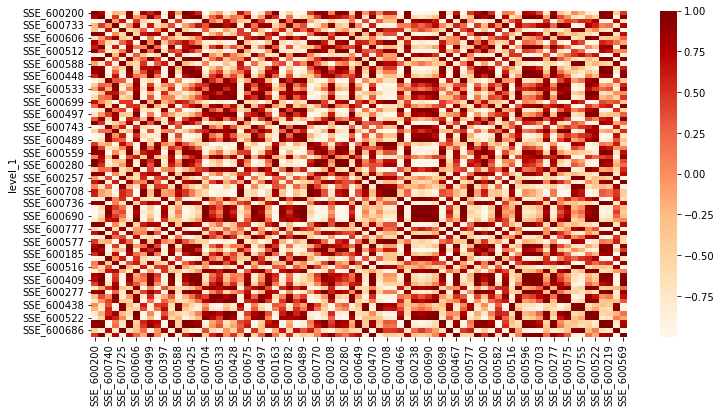

In [14]:
f, ax = plt.subplots(figsize=(12, 6))
heatmap = sns.heatmap(df_copy,
                    cmap = "OrRd",
                      annot = False,
                      )

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [4]:
import corrfuncs

In [5]:
corrfuncs.laggedcorr(df,lag=4)

,SSE_600200,SSE_600370,SSE_600740,SSE_600733,SSE_600725,SSE_600521,SSE_600606,SSE_600502,SSE_600499,SSE_600512,...,SSE_600657,SSE_600575,SSE_600438,SSE_600755,SSE_600795,SSE_600522,SSE_600628,SSE_600219,SSE_600686,SSE_600569
level_1,,,,,,,,,,,,,,,,,,,,,
SSE_600200,1.000000,0.564700,-0.822833,-0.022386,-0.136440,0.783893,-0.217182,0.728578,0.589011,0.500622,...,-0.255866,-0.306044,0.158676,-0.272747,-0.101901,-0.258681,0.944321,0.378624,-0.414264,0.226631
SSE_600370,0.564700,1.000000,-0.253172,0.806418,0.180670,0.123047,0.674234,0.586236,0.902846,0.834920,...,0.496241,0.612866,0.589376,-0.784519,0.728562,0.603781,0.709524,0.922309,-0.965400,0.874795
SSE_600740,-0.822833,-0.253172,1.000000,0.211537,0.669157,-0.990418,0.498786,-0.214816,-0.520197,0.038123,...,0.117304,0.497935,0.420158,0.325276,0.473473,0.612018,-0.849240,0.083900,0.218749,0.228134
SSE_600733,-0.022386,0.806418,0.211537,1.000000,0.199542,-0.343345,0.945847,0.115314,0.723100,0.586589,...,0.845717,0.951151,0.503356,-0.822639,0.912978,0.867953,0.221022,0.801783,-0.895308,0.849532
SSE_600725,-0.136440,0.180670,0.669157,0.199542,1.000000,-0.684155,0.465820,0.579136,-0.258641,0.657004,...,-0.264192,0.343048,0.900590,0.348423,0.581113,0.627332,-0.297451,0.541630,-0.025641,0.590345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSE_600522,-0.258681,0.603781,0.612018,0.867953,0.627332,-0.713807,0.980460,0.217597,0.337970,0.658568,...,0.582686,0.945552,0.764898,-0.431808,0.985905,1.000000,-0.132299,0.795504,-0.630247,0.881707
SSE_600628,0.944321,0.709524,-0.849240,0.221022,-0.297451,0.778998,-0.034716,0.570217,0.808687,0.478192,...,0.068364,-0.086740,0.084003,-0.567089,0.035394,-0.132299,1.000000,0.454319,-0.632302,0.317117
SSE_600219,0.378624,0.922309,0.083900,0.801783,0.541630,-0.203545,0.796236,0.683019,0.671191,0.953959,...,0.370361,0.702878,0.849694,-0.556835,0.878388,0.795504,0.454319,1.000000,-0.846122,0.987269


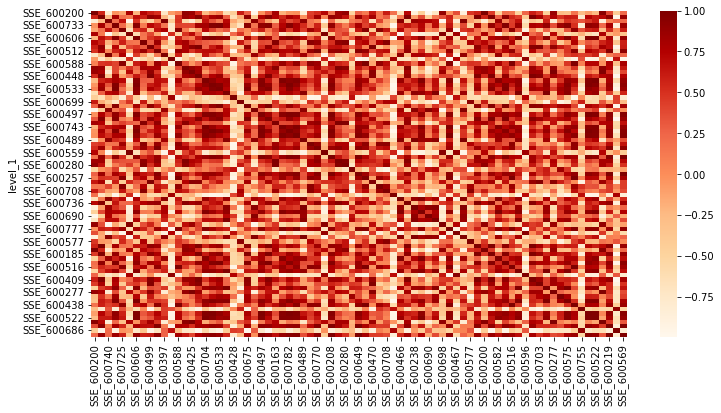

In [6]:
corrfuncs.laggedheatmap(corrfuncs.laggedcorr(df,lag=4))

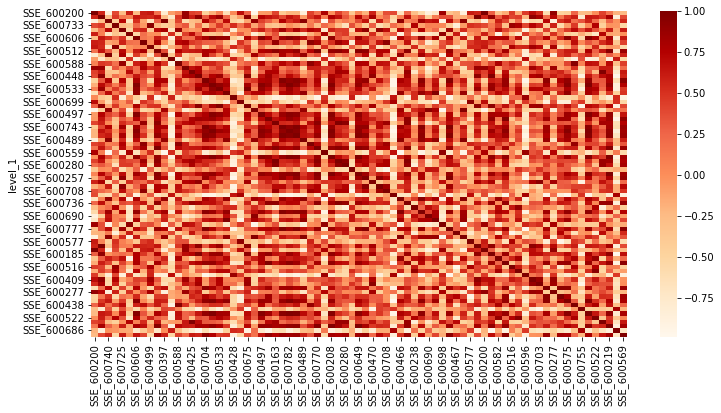

In [7]:
corrfuncs.laggedheatmap(corrfuncs.laggedcorr(df,lag=5))

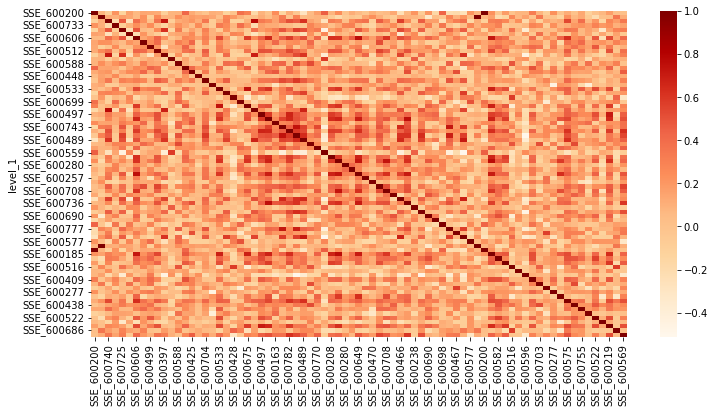

In [8]:
corrfuncs.laggedheatmap(corrfuncs.laggedcorr(df,lag=50))

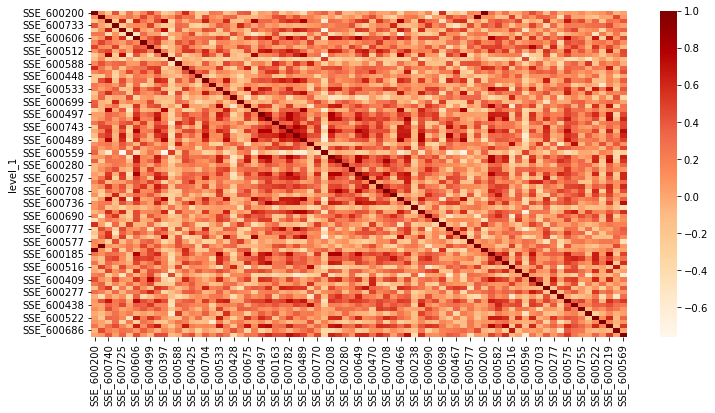

In [18]:
corrfuncs.laggedheatmap(corrfuncs.laggedcorr(df,lag=20))

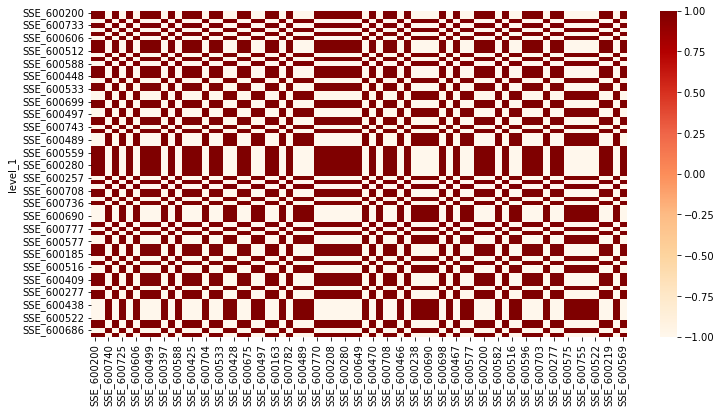

In [24]:
corrfuncs.laggedheatmap(corrfuncs.laggedcorr(df,lag=2))